In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline



In [8]:
df = pd.read_csv('C:\\Users\\Vni_d\\projetokaegglevisual\\Arquivos Datasets\\Movies.csv')
df.head()


,Unnamed: 0,id,adult,title,original_language,overview,title.1,popularity,release_date,vote_average,vote_count
0,0,278,False,The Shawshank Redemption,en,Framed in the 1940s for the double murder of h...,The Shawshank Redemption,86.715,1994-09-23,8.7,21988
1,1,19404,False,Dilwale Dulhania Le Jayenge,hi,"Raj is a rich, carefree, happy-go-lucky second...",Dilwale Dulhania Le Jayenge,54.110,1995-10-19,8.7,3769
2,2,238,False,The Godfather,en,"Spanning the years 1945 to 1955, a chronicle o...",The Godfather,121.661,1972-03-14,8.7,16371
3,3,424,False,Schindler's List,en,The true story of how businessman Oskar Schind...,Schindler's List,55.646,1993-12-15,8.6,13038
4,4,240,False,The Godfather Part II,en,In the continuing saga of the Corleone crime f...,The Godfather Part II,62.479,1974-12-20,8.6,9868


In [9]:
df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000
mean,4989.500000,162130.236874,38.568937,6.636914,1558.100000
std,2881.122177,212944.309601,240.564244,0.750207,2664.028324
min,0.000000,5.000000,0.600000,4.900000,200.000000
25%,2494.750000,10129.500000,9.211000,6.100000,317.000000
50%,4989.500000,29940.000000,14.215500,6.600000,589.000000
75%,7484.250000,311805.500000,28.128000,7.200000,1475.000000
max,9979.000000,961484.000000,16755.428000,8.700000,32055.000000


In [17]:
df.shape

(9980, 11)

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9980 entries, 0 to 9979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9980 non-null   int64  
 1   id                 9980 non-null   int64  
 2   adult              9980 non-null   bool   
 3   title              9980 non-null   object 
 4   original_language  9980 non-null   object 
 5   overview           9969 non-null   object 
 6   title.1            9980 non-null   object 
 7   popularity         9980 non-null   float64
 8   release_date       9980 non-null   object 
 9   vote_average       9980 non-null   float64
 10  vote_count         9980 non-null   int64  
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 789.6+ KB


In [14]:
dfcolumn_removed = df.drop('Unnamed: 0', axis=1)


In [15]:
dfcolumn_removed.head()

,id,adult,title,original_language,overview,title.1,popularity,release_date,vote_average,vote_count
0,278,False,The Shawshank Redemption,en,Framed in the 1940s for the double murder of h...,The Shawshank Redemption,86.715,1994-09-23,8.7,21988
1,19404,False,Dilwale Dulhania Le Jayenge,hi,"Raj is a rich, carefree, happy-go-lucky second...",Dilwale Dulhania Le Jayenge,54.110,1995-10-19,8.7,3769
2,238,False,The Godfather,en,"Spanning the years 1945 to 1955, a chronicle o...",The Godfather,121.661,1972-03-14,8.7,16371
3,424,False,Schindler's List,en,The true story of how businessman Oskar Schind...,Schindler's List,55.646,1993-12-15,8.6,13038
4,240,False,The Godfather Part II,en,In the continuing saga of the Corleone crime f...,The Godfather Part II,62.479,1974-12-20,8.6,9868


In [20]:
colunas_null=df.columns[df.isnull().any()]
df.isnull().sum()

Unnamed: 0            0
id                    0
adult                 0
title                 0
original_language     0
overview             11
title.1               0
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'vote_count'}>]], dtype=object)

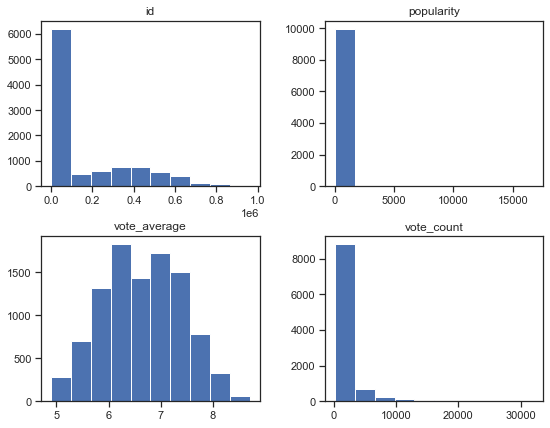

In [41]:
dfcolumn_removed.hist(bins=10,figsize=(9,7),grid=False)


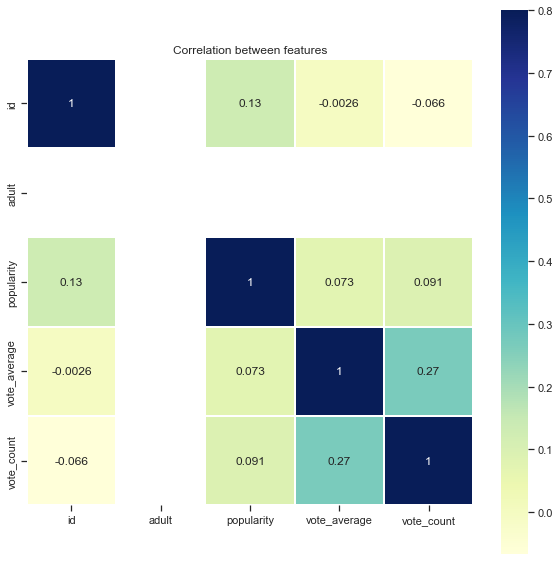

In [42]:
corr=dfcolumn_removed.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');